# Assignment 6

## Try to submit as an HTML file

<font size = "5">
Print your Emory code below

In [ ]:
print(2524612)

<font size = "5">

Import the "pandas", "matplotlib.pyplot", "numPy" and "statsmodels.formula.api" libraries

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf

<font size = "5">

(a) Functions

<font size = "3">

- Read the dataset labelled features.csv.
- Create a ``` lambda ``` function that checks if horsepower $>$ 100
- Create a new list that shows true if horsepower $>$ 100 and false <br>
if horsepower $\leq$ 100.
- Count how many cars have horsewpower $> 100$.

To get full credit use either the apply or the map function <br>
(see Lectures 7 and 8)

In [44]:
# Read features dataset
features = pd.read_csv("Data/features.csv")

# Get just the subset where the `horsepower` variable is numeric
features_subset = features.query("horsepower.str.isnumeric() == True")

# Lambda function
hp_over_100 = lambda hp: int(hp) > 100

# Map the lambda function on to variable `horsepower`
list_hp_over_100 = list(map(hp_over_100, features_subset["horsepower"]))

# Sum up the `True`s
cars_over_100_hp = sum(list_hp_over_100)

print("There are " + str(cars_over_100_hp) + " cars that have horsepower > 100.")

There are 150 cars that have horsepower > 100.


<font size = "5">

(b) Subsetting Data

<font size = "3" >

- Read the dataset labelled features.csv.
- Define a global variable called ```threshold``` that takes the <br>
value 3000
- Subset the data to get one dataset with weight $>$ threshold and <br>
another with weight $\le$ 3000. Use the ```.query()``` function.
- Compute the mean acceleration for each of these datasets.<br>

Note: Review how to define a gloabl variable inside ```.query()```
 

In [37]:
features = pd.read_csv("Data/features.csv")
threshold = 3000

features_weight_above_threshold = features.query("weight > @threshold")
features_weight_below_or_equal_threshold = features.query("weight <= 3000")

print("Mean acceleration for vehicles above 3000: " + str(np.mean(features_weight_above_threshold["acceleration"])))
print("Mean acceleration for vehicles below or equal to 3000: " + str(np.mean(features_weight_below_or_equal_threshold["acceleration"])))

Mean acceleration for vehicles above 3000: 14.7
Mean acceleration for vehicles below or equal to 3000: 16.202173913043477


<font size = "5">

(c) Regression

<font size = "3">

In this exercise you are asked to plot acceleration vs. weight and to plot <br>
 the best fit line.

- Run a linear regression between acceleration and weight.
- Extract the intercept and coefficient.
- Using your predicted coefficients, compute the predicted value of acceleration
- Plot a scatter plot with acceleration on the y axis and weight on the x axis.
- On that same figure, plot a line with the predicted values of acceleration

Do not forget to label your axes and title.

Intercept is 19.606158370537564 and slope is -0.0013594244697718927


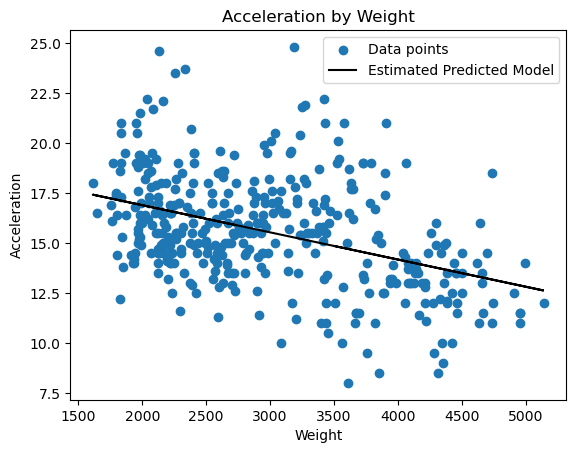

In [63]:

model = smf.ols(formula = 'acceleration ~ weight', data = features)
results = model.fit()

b0 = results.params[0]
b1 = results.params[1]
print("Intercept is " + str(b0) + " and slope is " + str(b1))

features["predicted_acceleration"] = b0 + b1 * features["weight"]

plt.scatter(x = features["weight"], y = features["acceleration"])
plt.plot(features["weight"], features["predicted_acceleration"], color = "black")
plt.legend(labels = ["Data points","Estimated Predicted Model"])
plt.title("Acceleration by Weight")
plt.xlabel("Weight")
plt.ylabel("Acceleration")
plt.show()



<font size = "5">

(d) Use sorting + ".iloc[]"

<font size = "3">

- Read the "fifa23_players_basic.csv" dataset
- Use ".sort_values()" to order the "Age" column <br>
from youngest to oldest
- Get a subset with the 5 youngest players

In [59]:
fifa23_players = pd.read_csv("Data/fifa23_players_basic.csv")

players_sorted = fifa23_players.sort_values(by = "Age", ascending = True)

subset = players_sorted.iloc[ :5, :]
display(subset)

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,Preferred Foot,Weak Foot Rating,Skill Moves,International Reputation,National Team Name,National Team Image Link,National Team Position,National Team Jersey Number,Attacking Work Rate,Defensive Work Rate
17956,A. Dithmer,Andreas Dithmer,53,76,275000,GK,GK,Denmark,https://cdn.sofifa.net/players/269/573/23_60.png,16,...,Right,2,1,1,-,https://cdn.sofifa.net/flags/dk.png,-,-,Medium,Medium
18014,J. Ardila,José Ardila,53,73,250000,CM,CAM,Venezuela,https://cdn.sofifa.net/players/268/892/23_60.png,16,...,Right,3,2,1,-,https://cdn.sofifa.net/flags/ve.png,-,-,Medium,Medium
16084,S. Ngoma,Serge Ngoma,58,82,650000,RW,RM,United States,https://cdn.sofifa.net/players/267/796/23_60.png,16,...,Right,3,2,1,-,https://cdn.sofifa.net/flags/us.png,-,-,High,Medium
11481,O. Vargas,Obed Vargas,64,81,1500000,"CM,CDM,RM",CAM,United States,https://cdn.sofifa.net/players/263/701/23_60.png,16,...,Right,3,3,1,-,https://cdn.sofifa.net/flags/us.png,-,-,High,Medium
17591,A. Madaliński,Alan Madaliński,54,68,210000,GK,GK,Poland,https://cdn.sofifa.net/players/270/590/23_60.png,16,...,Right,3,1,1,-,https://cdn.sofifa.net/flags/pl.png,-,-,Medium,Medium


<font size = "5">

(e) Use queries + global variables

<font size = "3">

- Read the "fifa23_players_basic.csv" dataset
- Compute the mean of the column "Value(in Euro)" <br>
and store it as a variable
- Subset the players whose value is above the mean value <br>
  using ".query()"


HINT: Remember that there is a special syntax for <br>
when the column names have spaces (see Lecture 10) <br>
Reference the column as ``` `Value(in Euro)`    ``` inside .query()

In [62]:
display(fifa23_players)
mean_value = fifa23_players["Value(in Euro)"].mean()

subset = fifa23_players.query("`Value(in Euro)` > @mean_value")
display(subset)

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,Preferred Foot,Weak Foot Rating,Skill Moves,International Reputation,National Team Name,National Team Image Link,National Team Position,National Team Jersey Number,Attacking Work Rate,Defensive Work Rate
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,Left,4,4,5,Argentina,https://cdn.sofifa.net/flags/ar.png,RW,10,Low,Low
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,Right,4,4,4,France,https://cdn.sofifa.net/flags/fr.png,ST,19,Medium,Medium
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,Right,4,4,5,Poland,https://cdn.sofifa.net/flags/pl.png,ST,9,High,Medium
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,Right,5,4,4,Belgium,https://cdn.sofifa.net/flags/be.png,RF,7,High,High
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,Right,4,5,4,France,https://cdn.sofifa.net/flags/fr.png,ST,10,High,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,D. Collins,Darren Collins,47,56,110000,"ST,RM",CAM,Republic of Ireland,https://cdn.sofifa.net/players/243/725/23_60.png,21,...,Right,3,2,1,-,-,-,-,Medium,Medium
18535,Yang Dejiang,Dejiang Yang,47,57,90000,CDM,CDM,China PR,https://cdn.sofifa.net/players/261/933/23_60.png,17,...,Right,3,2,1,-,-,-,-,Medium,Medium
18536,L. Mullan,Liam Mullan,47,67,130000,CM,RM,Northern Ireland,https://cdn.sofifa.net/players/267/823/23_60.png,18,...,Right,3,2,1,-,-,-,-,High,Medium
18537,D. McCallion,Daithí McCallion,47,61,100000,CB,CB,Republic of Ireland,https://cdn.sofifa.net/players/267/824/23_60.png,17,...,Right,3,2,1,-,-,-,-,Medium,Medium


,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,Preferred Foot,Weak Foot Rating,Skill Moves,International Reputation,National Team Name,National Team Image Link,National Team Position,National Team Jersey Number,Attacking Work Rate,Defensive Work Rate
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,Left,4,4,5,Argentina,https://cdn.sofifa.net/flags/ar.png,RW,10,Low,Low
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,Right,4,4,4,France,https://cdn.sofifa.net/flags/fr.png,ST,19,Medium,Medium
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,Right,4,4,5,Poland,https://cdn.sofifa.net/flags/pl.png,ST,9,High,Medium
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,Right,5,4,4,Belgium,https://cdn.sofifa.net/flags/be.png,RF,7,High,High
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,Right,4,5,4,France,https://cdn.sofifa.net/flags/fr.png,ST,10,High,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7066,F. Rieder,Fabian Rieder,68,83,2900000,"CAM,CM",CAM,Switzerland,https://cdn.sofifa.net/players/259/306/23_60.png,20,...,Left,3,2,1,-,https://cdn.sofifa.net/flags/ch.png,-,-,High,Medium
7071,J. Bakayoko,Johan Bakayoko,68,85,3100000,RW,LM,Belgium,https://cdn.sofifa.net/players/265/450/23_60.png,19,...,Left,3,3,1,-,https://cdn.sofifa.net/flags/be.png,-,-,High,Medium
7090,M. Arezo,Matías Arezo,68,81,2900000,"ST,CAM",ST,Uruguay,https://cdn.sofifa.net/players/254/653/23_60.png,19,...,Right,3,4,1,-,https://cdn.sofifa.net/flags/uy.png,-,-,High,Medium
7096,Y. Kallon,Yayah Kallon,68,82,3000000,"RM,RW,CF",ST,Sierra Leone,https://cdn.sofifa.net/players/262/333/23_60.png,21,...,Left,2,3,1,-,-,-,-,High,Low


<font size = "5">